<a href="https://colab.research.google.com/github/noahflore/colab/blob/main/atividade_final_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explicação Detalhada do Código da Tabuada em Python

Vamos analisar cada parte do programa para entender completamente seu funcionamento:
1. Função obter_numero()
python

def obter_numero():
    while True:
        entrada = input("Digite um número entre 1 e 10 para ver sua tabuada: ")

    def obter_numero(): - Define uma função chamada obter_numero

    while True: - Cria um loop infinito que só será interrompido quando um número válido for inserido

    input(...) - Solicita ao usuário que digite um número e armazena na variável entrada

2. Tratamento de erros e validação
python

        try:
            numero = int(entrada)
            if 1 <= numero <= 10:
                return numero
            else:
                print("Erro: O número deve estar entre 1 e 10! Tente novamente.")
        except ValueError:
            print("Erro: Por favor, digite um número válido! Tente novamente.")

    try: - Inicia um bloco onde podem ocorrer exceções (erros)

    numero = int(entrada) - Tenta converter a entrada do usuário para inteiro

        Se falhar (por exemplo, se o usuário digitou "abc"), pula para o except

    if 1 <= numero <= 10: - Verifica se o número está no intervalo permitido

        Se estiver, return numero encerra a função e retorna o valor válido

        Se não estiver, mostra mensagem de erro e o loop continua

    except ValueError: - Captura o erro se a conversão para inteiro falhar

        Mostra mensagem pedindo um número válido e o loop continua

3. Parte principal do programa
python

# Obtém o número validado
numero = obter_numero()

# Exibe a tabuada
print(f"\nTabuada do {numero}:")
print("-" * 15)
for i in range(1, 11):
    resultado = numero * i
    print(f"{numero} x {i:2} = {resultado:2}")
print("-" * 15)

    numero = obter_numero() - Chama a função que valida o número e armazena o resultado

    print(f"\nTabuada do {numero}:") - Mostra o cabeçalho da tabuada

    print("-" * 15) - Imprime uma linha divisória

    for i in range(1, 11): - Loop que itera de 1 a 10

        resultado = numero * i - Calcula cada linha da tabuada

        print(f"{numero} x {i:2} = {resultado:2}") - Formata e exibe cada linha

            :2 formata o número com 2 dígitos (alinhado à direita)

    print("-" * 15) - Imprime outra linha divisória ao final

Fluxo do Programa

    Define a função de validação

    Chama a função para obter um número válido

        Fica em loop até receber um número correto

    Com o número válido, calcula e exibe a tabuada

    Formata a saída para melhor visualização

Por que este código é robusto?

    Não quebra se o usuário digitar letras ou símbolos

    Garante que só números no intervalo 1-10 sejam aceitos

    Fornece mensagens claras de erro para orientar o usuário

    Tem uma estrutura organizada e fácil de manter



In [ ]:
def obter_numero():
    while True:
        entrada = input("Digite um número entre 1 e 10 para ver sua tabuada: ")
        try:
            numero = int(entrada)
            if 1 <= numero <= 10:
                return numero
            else:
                print("Erro: O número deve estar entre 1 e 10! Tente novamente.")
        except ValueError:
            print("Erro: Por favor, digite um número válido! Tente novamente.")

# Obtém o número validado
numero = obter_numero()

# Exibe a tabuada
print(f"\nTabuada do {numero}:")
print("-" * 15)
for i in range(1, 11):
    resultado = numero * i
    print(f"{numero} x {i:2} = {resultado:2}")
print("-" * 15)

Digite um número entre 1 e 10 para ver sua tabuada: a
Erro: Por favor, digite um número válido! Tente novamente.
Digite um número entre 1 e 10 para ver sua tabuada: 11
Erro: O número deve estar entre 1 e 10! Tente novamente.
Digite um número entre 1 e 10 para ver sua tabuada: 7

Tabuada do 7:
---------------
7 x  1 =  7
7 x  2 = 14
7 x  3 = 21
7 x  4 = 28
7 x  5 = 35
7 x  6 = 42
7 x  7 = 49
7 x  8 = 56
7 x  9 = 63
7 x 10 = 70
---------------


# Explicação Detalhada do Código de Análise de CSV

Vamos decompor o funcionamento deste código passo a passo:

## 1. Detecção do Encoding do Arquivo

```python
with open(file_path, 'rb') as f:
    raw_data = f.read(10000)  # Lê os primeiros 10KB para análise
    result = chardet.detect(raw_data)
    encoding = result['encoding']
```

- `open(file_path, 'rb')`: Abre o arquivo em modo binário ('rb') para leitura
- `f.read(10000)`: Lê apenas os primeiros 10KB do arquivo (suficiente para detecção)
- `chardet.detect()`: Analisa os padrões de bytes para inferir o encoding
- `result['encoding']`: Extrai o encoding detectado (ex: 'utf-8', 'iso-8859-1')

## 2. Tentativa de Leitura com Encoding Detectado

```python
try:
    df = pd.read_csv(file_path, encoding=encoding)
    print("\nArquivo carregado com sucesso!\n")
except UnicodeDecodeError:
    [...]
```

- Tenta ler o CSV com o encoding detectado
- Se falhar (UnicodeDecodeError), executa o bloco except

## 3. Fallback para Encodings Alternativos

```python
encodings_to_try = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']
for enc in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print(f"\nArquivo carregado com encoding alternativo: {enc}\n")
        break
    except UnicodeDecodeError:
        continue
```

- Lista de encodings alternativos comuns
- Tenta cada um até encontrar um que funcione
- Se nenhum funcionar, levanta uma exceção

## 4. Análise Básica do DataFrame

```python
print("=== Informações do DataFrame (.info) ===")
print(df.info())

print("\n=== Estatísticas Descritivas (.describe) ===")
print(df.describe(include='all'))
```

- `.info()`: Mostra:
  - Número de linhas e colunas
  - Nomes e tipos das colunas
  - Contagem de valores não-nulos
  - Uso de memória

- `.describe(include='all')`: Gera estatísticas:
  - Para colunas numéricas: contagem, média, desvio padrão, etc.
  - Para colunas categóricas: contagem, valores únicos, moda

## Fluxo Completo do Programa

1. Detecta automaticamente o encoding do arquivo CSV
2. Tenta ler com o encoding detectado
3. Se falhar, testa encodings alternativos comuns
4. Exibe metadados e estatísticas básicas do DataFrame
5. Retorna o DataFrame carregado para uso posterior

## Por que este código é robusto?

1. **Tolerância a falhas**:
   - Não assume um encoding específico
   - Tenta múltiplas opções antes de desistir

2. **Eficiência**:
   - Analisa apenas parte do arquivo para detecção
   - Fornece feedback claro sobre o processo

3. **Utilidade**:
   - Oferece um resumo rápido dos dados
   - Retorna o DataFrame para análises posteriores

## Exemplo de Saída Típica

```
Encoding detectado: utf-8 (confiança: 99.00%)

Arquivo carregado com sucesso!

=== Informações do DataFrame (.info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Company Name              930 non-null    object
 1   Model Name                930 non-null    object
[...]
dtypes: object(15)
memory usage: 109.1+ KB
None

=== Estatísticas Descritivas (.describe) ===
       Company Name    Model Name Mobile Weight  [...]
count          930           930           930  
unique          25           930            25  
top         Samsung  iPhone 16 128GB        174g  
freq            95             3            72  
[...]
```

Esta função é particularmente útil para:
- Explorar novos datasets desconhecidos
- Lidar com arquivos de fontes diversas
- Iniciar processos de ETL (Extract, Transform, Load)

In [ ]:
import pandas as pd
import chardet

def analyze_csv_file(file_path):
    """
    Analisa um arquivo CSV identificando seu encoding e mostrando informações básicas.

    Parâmetros:
        file_path (str): Caminho para o arquivo CSV

    Retorna:
        DataFrame: O DataFrame carregado do arquivo CSV
    """

    # 1. Detectar o encoding do arquivo
    with open(file_path, 'rb') as f:
        raw_data = f.read(10000)  # Lê os primeiros 10KB para análise
        result = chardet.detect(raw_data)
        encoding = result['encoding']

    print(f"Encoding detectado: {encoding} (confiança: {result['confidence']:.2%})")

    # 2. Tentar ler o arquivo com o encoding detectado
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print("\nArquivo carregado com sucesso!\n")
    except UnicodeDecodeError:
        # Se falhar, tentar com outros encodings comuns
        encodings_to_try = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']
        for enc in encodings_to_try:
            try:
                df = pd.read_csv(file_path, encoding=enc)
                print(f"\nArquivo carregado com encoding alternativo: {enc}\n")
                break
            except UnicodeDecodeError:
                continue
        else:
            raise ValueError("Não foi possível determinar o encoding do arquivo.")

    # 3. Mostrar informações básicas
    print("=== Informações do DataFrame (.info) ===")
    print(df.info())

    print("\n=== Estatísticas Descritivas (.describe) ===")
    print(df.describe(include='all'))

    return df

# Uso da função
file_path = "/content/Mobiles Dataset (2025).csv"
mobile_data = analyze_csv_file(file_path)

Encoding detectado: ascii (confiança: 100.00%)

Arquivo carregado com encoding alternativo: latin-1

=== Informações do DataFrame (.info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 no

# Explicação Detalhada do Código de Processamento de Câmeras

Vamos analisar cada parte deste código que cria um DataFrame especializado em informações de câmeras a partir dos dados de smartphones:

## 1. Criação do DataFrame Base

```python
df = pd.DataFrame(mobile_data)
```
- Transforma os dados brutos (`mobile_data`) em um DataFrame pandas
- Isso organiza os dados em formato tabular (linhas e colunas) para fácil manipulação

## 2. Seleção de Colunas Específicas

```python
cameras_df = df[['Company Name', 'Model Name', 'Front Camera', 'Back Camera']].copy()
```
- Cria um novo DataFrame (`cameras_df`) contendo apenas as 4 colunas especificadas
- `copy()` garante que estamos criando uma cópia independente dos dados originais
- Colunas selecionadas:
  - `Company Name`: Fabricante do dispositivo
  - `Model Name`: Modelo específico
  - `Front Camera`: Especificações da câmera frontal
  - `Back Camera`: Especificações da(s) câmera(s) traseira(s)

## 3. Processamento das Câmeras Traseiras

### Contagem de Câmeras Traseiras
```python
cameras_df['Back Camera Count'] = cameras_df['Back Camera'].apply(lambda x: len(x.split(' + ')))
```
- Cria nova coluna `Back Camera Count`
- `split(' + ')` divide a string onde há o padrão " + " (indicando múltiplas câmeras)
- `len()` conta quantas câmeras foram identificadas
- Exemplo: "12MP + 8MP" → ["12MP", "8MP"] → 2 câmeras

### Identificação da Câmera Principal
```python
cameras_df['Main Back Camera'] = cameras_df['Back Camera'].apply(lambda x: x.split(' + ')[0])
```
- Extrai sempre o primeiro elemento da divisão como câmera principal
- Exemplo: "48MP + 12MP + 12MP" → "48MP"

### Identificação das Câmeras Secundárias
```python
cameras_df['Secondary Back Cameras'] = cameras_df['Back Camera'].apply(lambda x: ' + '.join(x.split(' + ')[1:]) if len(x.split(' + ')) > 1 else None)
```
- Pega todos os elementos após o primeiro (se existirem)
- Junta-os novamente com " + " como separador
- Se houver apenas uma câmera, define como `None`
- Exemplo:
  - "50MP + 8MP + 2MP" → "8MP + 2MP"
  - "12MP" → None

## 4. Exibição dos Resultados

```python
print("DataFrame completo original:")
print(df)
print("\nDataFrame especializado em câmeras:")
print(cameras_df)
```
- Mostra primeiro o DataFrame original completo
- Depois mostra o novo DataFrame processado com as informações de câmeras

## Por Que Este Código é Útil?

1. **Organização de Dados**:
   - Cria uma visão focada apenas nas informações de câmeras
   - Mantém a relação com fabricante e modelo

2. **Estruturação de Informações Complexas**:
   - Desmembra configurações múltiplas de câmeras em componentes individuais
   - Permite análises mais granulares

3. **Preparação para Análise**:
   - As novas colunas criadas facilitam:
     - Comparações entre fabricantes
     - Análise de tendências de mercado
     - Correlações entre número de câmeras e preço

## Exemplo de Saída Esperada

Para uma linha com:
- `Back Camera`: "48MP + 12MP + 12MP"

O resultado seria:
- `Back Camera Count`: 3
- `Main Back Camera`: "48MP"
- `Secondary Back Cameras`: "12MP + 12MP"

## Possíveis Aprimoramentos

1. **Padronização de Unidades**:
   ```python
   # Extrair apenas os valores numéricos em MP
   cameras_df['Main_Back_MP'] = cameras_df['Main Back Camera'].str.extract('(\d+)').astype(float)
   ```

2. **Classificação por Tipo de Câmera**:
   ```python
   # Identificar câmeras ultra-wide, telephoto, etc.
   cameras_df['Has_Telephoto'] = cameras_df['Secondary Back Cameras'].str.contains('telephoto', case=False)
   ```

3. **Análise de Câmeras Frontais**:
   ```python
   # Processamento similar para câmeras frontais
   cameras_df['Front_MP'] = cameras_df['Front Camera'].str.extract('(\d+)').astype(float)
   ```

Este código transforma dados brutos de câmeras em informações estruturadas que podem alimentar diversas análises e visualizações de dados no setor de smartphones.

In [ ]:

df = pd.DataFrame(mobile_data)

# Criando o DataFrame apenas com as informações das câmeras
cameras_df = df[['Company Name', 'Model Name', 'Front Camera', 'Back Camera']].copy()

# Adicionando colunas detalhadas para as câmeras traseiras
# Vamos separar as configurações múltiplas da câmera traseira
cameras_df['Back Camera Count'] = cameras_df['Back Camera'].apply(lambda x: len(x.split(' + ')))
cameras_df['Main Back Camera'] = cameras_df['Back Camera'].apply(lambda x: x.split(' + ')[0])
cameras_df['Secondary Back Cameras'] = cameras_df['Back Camera'].apply(lambda x: ' + '.join(x.split(' + ')[1:]) if len(x.split(' + ')) > 1 else None)

# Exibindo o DataFrame resultante
print("DataFrame completo original:")
print(df)
print("\nDataFrame especializado em câmeras:")
print(cameras_df)

DataFrame completo original:
    Company Name            Model Name Mobile Weight   RAM     Front Camera  \
0          Apple       iPhone 16 128GB          174g   6GB             12MP   
1          Apple       iPhone 16 256GB          174g   6GB             12MP   
2          Apple       iPhone 16 512GB          174g   6GB             12MP   
3          Apple  iPhone 16 Plus 128GB          203g   6GB             12MP   
4          Apple  iPhone 16 Plus 256GB          203g   6GB             12MP   
..           ...                   ...           ...   ...              ...   
925         Poco          Pad 5G 128GB          571g   8GB              8MP   
926         Poco          Pad 5G 256GB          571g   8GB              8MP   
927      Samsung  Galaxy Z Fold6 256GB          239g  12GB  10MP, 4MP (UDC)   
928      Samsung  Galaxy Z Fold6 512GB          239g  12GB  10MP, 4MP (UDC)   
929      Samsung    Galaxy Z Fold6 1TB          239g  12GB  10MP, 4MP (UDC)   

    Back Camera       

# Análise das Colunas de Câmeras no Dataset de Smartphones

Com base no DataFrame especializado em câmeras que criamos, podemos fazer algumas observações interessantes sobre as configurações de câmera frontal e traseira nos dispositivos móveis deste dataset.

## Análise das Câmeras Frontais

1. **Variação de Resolução**:
   - A maioria dos iPhones e smartphones premium mantêm câmeras frontais de **12MP**, que parece ser o padrão atual para dispositivos flagship
   - Dispositivos mais acessíveis como o Poco Pad utilizam câmeras de **8MP**
   - O Samsung Galaxy Z Fold6 apresenta uma configuração incomum: **10MP + 4MP (UDC)**, indicando:
     - Uma câmera principal de 10MP
     - Uma câmera secundária de 4MP sob a tela (Under Display Camera - UDC)

2. **Padrões de Mercado**:
   - A Apple mantém consistência com 12MP em todos seus modelos
   - A variação ocorre principalmente entre fabricantes e categorias de produtos (flagship vs mid-range)

## Análise das Câmeras Traseiras

1. **Configurações Simples**:
   - Todos os dispositivos no sample mostrado têm **configurações de câmera única** na traseira (Back Camera Count = 1)
   - iPhones mostram **48MP** (provavelmente usando pixel binning para fotos de 12MP)
   - Dispositivos Samsung flagship apresentam **50MP**
   - Tablets como o Poco Pad têm câmeras mais modestas de **8MP**

2. **Observação Importante**:
   - Curiosamente, o dataset parece ter simplificado as configurações de câmera traseira
   - Sabemos que iPhones e Galaxy Z Fold normalmente têm sistemas multi-câmera
   - Isso pode indicar que:
     - O dataset está mostrando apenas a câmera principal
     - Ou houve alguma simplificação nos dados coletados

## Comparativo entre Frontais e Traseiras

1. **Disparidade de Qualidade**:
   - Enquanto as traseiras variam de 8MP a 50MP
   - As frontais ficam entre 8MP e 12MP (com exceção do Fold6)
   - Reflete a prioridade histórica das fabricantes em câmeras traseiras

2. **Casos Especiais**:
   - O Galaxy Z Fold6 destaca-se com:
     - Sistema de câmera frontal mais complexo
     - Alta resolução na traseira (50MP)
     - Configuração UDC (Under Display Camera) que melhora a experiência em dispositivos dobráveis

## Limitações Identificadas

1. **Dados Simplificados**:
   - As configurações multi-câmera não estão totalmente representadas
   - Informações como abertura, tamanho do sensor e capacidades especiais não estão presentes

2. **Consistência**:
   - Algumas entradas como "10MP, 4MP (UDC)" poderiam ser padronizadas para melhor análise

## Sugestões para Análises Futuras

1. **Engenharia de Features**:
   - Extrair o valor numérico (removendo "MP") para permitir análises quantitativas
   - Criar flags para dispositivos com câmeras especiais (UDC, periscópio, etc.)

2. **Análises Possíveis**:
   ```python
   # Converter resoluções para valores numéricos
   cameras_df['Front_Camera_MP'] = cameras_df['Front Camera'].str.extract('(\d+)').astype(float)
   cameras_df['Back_Camera_MP'] = cameras_df['Main Back Camera'].str.extract('(\d+)').astype(float)
   
   # Média de resolução por marca
   cameras_df.groupby('Company Name')[['Front_Camera_MP', 'Back_Camera_MP']].mean()
   ```

3. **Visualização**:
   ```python
   import matplotlib.pyplot as plt
   
   plt.figure(figsize=(10, 6))
   cameras_df['Front_Camera_MP'].value_counts().sort_index().plot(kind='bar')
   plt.title('Distribuição de Resoluções de Câmeras Frontais')
   plt.xlabel('Resolução (MP)')
   plt.ylabel('Quantidade de Modelos')
   plt.show()
   ```

Esta análise mostra que, embora o dataset contenha informações valiosas sobre câmeras, há oportunidades para enriquecimento dos dados e análises mais profundas sobre como as diferentes fabricantes priorizam as capacidades fotográficas em seus dispositivos.

# Explicação Detalhada do Código de Junção de DataFrames

Vamos analisar passo a passo o funcionamento do código corrigido para unir os relatórios de felicidade:

## 1. Definição da Função Principal

```python
def merge_happiness_reports(df1_path, df2_path, merge_method='auto'):
```
- **Parâmetros**:
  - `df1_path`: Caminho para o primeiro arquivo CSV (Relatório 2020)
  - `df2_path`: Caminho para o segundo arquivo CSV (Relatório 2022)
  - `merge_method`: Método de junção ('auto', 'merge' ou 'concat')

## 2. Carregamento dos Dados

```python
df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)
```
- Lê os arquivos CSV e os converte em DataFrames pandas
- Cada DataFrame contém os dados de um ano específico do relatório

## 3. Lógica de Junção Automática

```python
if merge_method == 'auto':
    common_columns = set(df1.columns) & set(df2.columns)
    if len(common_columns) >= 1 and 'Country' in common_columns:
        combined_df = pd.merge(df1, df2, on='Country', how='outer', suffixes=('_2020', '_2022'))
        print("DataFrames unidos por coluna 'Country'")
    else:
        combined_df = pd.concat([df1, df2], axis=0, ignore_index=True)
        print("DataFrames concatenados verticalmente")
```

### Detalhamento:

**A. Verificação de Colunas Comuns**:
- `set(df1.columns) & set(df2.columns)` encontra colunas presentes em ambos DataFrames
- Verifica especificamente se 'Country' está entre elas

**B. Decisão do Método**:
1. **Merge (Junção Horizontal)**:
   - Usado quando há coluna 'Country' em comum
   - `pd.merge()` combina os dados usando 'Country' como chave
   - `how='outer'` mantém todos os países de ambos relatórios
   - `suffixes=('_2020', '_2022')` diferencia colunas com mesmo nome

2. **Concat (Junção Vertical)**:
   - Usado quando não há coluna 'Country' em comum
   - `pd.concat()` empilha os DataFrames verticalmente
   - `ignore_index=True` recria os índices sequencialmente

## 4. Saída de Informações

```python
print("\n=== DataFrame Combinado ===")
print(f"Linhas: {len(combined_df)}, Colunas: {len(combined_df.columns)}")
print("\nPrimeiras linhas:")
print(combined_df.head())
```
- Mostra estatísticas básicas do resultado
- Exibe as primeiras linhas para visualização rápida

## 5. Chamada da Função (Uso)

```python
df_2020 = "/content/2020_1713284660409.csv"
df_2022 = "/content/World Happiness Report 2022_1713284660724.csv"
combined_data = merge_happiness_reports(df_2020, df_2022)
```

## Fluxo de Execução:

1. Carrega ambos arquivos CSV
2. Analisa a estrutura dos dados automaticamente
3. Escolhe o método mais apropriado:
   - Se houver países em comum → Merge horizontal
   - Se forem dados diferentes → Concatenação vertical
4. Retorna um único DataFrame combinado
5. Exibe informações sobre o resultado

## Exemplo Prático de Saída:

Se os DataFrames tiverem:
- **2020.csv**: `[Country, Score, GDP]`
- **2022.csv**: `[Country, Score, Generosity]`

O resultado seria:

```
DataFrames unidos por coluna 'Country'

=== DataFrame Combinado ===
Linhas: 150, Colunas: 4

Primeiras linhas:
        Country  Score_2020  GDP  Score_2022  Generosity
0       Finland        7.8  1.3         7.9        0.2
1       Denmark        7.6  1.4         7.7        0.3
2    Switzerland       7.5  1.4         7.6        0.2
```

## Benefícios desta Implementação:

1. **Inteligência Automática**: Decide o melhor método de junção
2. **Preservação de Dados**: `outer` merge mantém todos os registros
3. **Rastreabilidade**: Sufixos identificam a origem dos dados
4. **Transparência**: Mostra exatamente como os dados foram combinados

In [3]:
import pandas as pd

def merge_happiness_reports(df1_path, df2_path, merge_method='auto'):
    """
    Une dois DataFrames do Relatório de Felicidade com exibição otimizada das colunas.
    """
    # Carregar os DataFrames
    df1 = pd.read_csv(df1_path)
    df2 = pd.read_csv(df2_path)

    # Determinar método de junção automático
    if merge_method == 'auto':
        common_columns = set(df1.columns) & set(df2.columns)
        if len(common_columns) >= 1 and 'Country' in common_columns:
            combined_df = pd.merge(df1, df2, on='Country', how='outer', suffixes=('_2020', '_2022'))
            print("DataFrames unidos por coluna 'Country'")
        else:
            combined_df = pd.concat([df1, df2], axis=0, ignore_index=True)
            print("DataFrames concatenados verticalmente")
    else:
        # Implementação para merge_method manual aqui
        pass

    # Exibir informações
    print("\n=== DataFrame Combinado ===")
    print(f"Linhas: {len(combined_df)}, Colunas: {len(combined_df.columns)}")
    print("\nPrimeiras linhas:")
    print(combined_df.head())

    return combined_df

# USO CORRETO:
df_2020 = "/content/2020_1713284660409.csv"
df_2022 = "/content/World Happiness Report 2022_1713284660724.csv"

combined_data = merge_happiness_reports(df_2020, df_2022)  # Usando df_2022 correto

DataFrames concatenados verticalmente

=== DataFrame Combinado ===
Linhas: 299, Colunas: 27

Primeiras linhas:
  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991             

# Explicação Detalhada do Código de Análise do World Happiness Report

Vamos decompor o código passo a passo para entender como ele analisa e visualiza os dados do relatório de felicidade:

## 1. Configuração Inicial

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
```
- **Bibliotecas utilizadas**:
  - `pandas`: Para manipulação dos dados
  - `matplotlib.pyplot`: Para criação de gráficos
  - `seaborn`: Para melhorar a visualização dos gráficos
  - `numpy`: Para operações matemáticas (usado no mapa de calor)

## 2. Definição da Função Principal

```python
def plot_happiness_insights(df):
```
- Recebe um DataFrame (`df`) como entrada contendo os dados do relatório

## 3. Preparação dos Dados

```python
if 'Happiness score' in df.columns:
    df['Score'] = df['Happiness score']
```
- Cria um alias 'Score' para a coluna 'Happiness score' para facilitar referência
- Isso padroniza o nome da coluna principal que será usada nas análises

## 4. Gráfico 1: Top 10 Países Mais Felizes

```python
top10 = df.nlargest(10, 'Score').sort_values('Score', ascending=True)
bars = plt.barh(top10['Country'], top10['Score'], color='#2b8cbe')
```
- **Lógica**:
  - Seleciona os 10 países com maior pontuação
  - Ordena do menor para o maior (para exibição vertical adequada)
  - Cria barras horizontais azuis

- **Melhorias visuais**:
  - Adiciona os valores exatos nas barras
  - Configura títulos e rótulos explicativos

## 5. Gráfico 2: Relação PIB vs Felicidade

```python
sns.scatterplot(data=df, x=gdp_col, y='Score', hue='Country', legend=False)
sns.regplot(data=df, x=gdp_col, y='Score', scatter=False, color='red')
```
- **Análise**:
  - Cada ponto representa um país
  - Eixo X: Contribuição do PIB per capita
  - Eixo Y: Pontuação de felicidade
  - Linha vermelha: Tendência linear

- **Detalhes**:
  - `hue='Country'` colore os pontos por país (mas sem legenda para não poluir)
  - `alpha=0.7` torna os pontos semi-transparentes para ver sobreposições

## 6. Gráfico 3: Mapa de Calor de Correlações

```python
numeric_cols = ['Score', 'Explained by: GDP per capita', ...]
corr = df[numeric_cols].corr()
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
```
- **Processamento**:
  - Seleciona colunas numéricas relevantes
  - Calcula matriz de correlação
  - Usa máscara triangular para mostrar apenas metade da matriz

- **Visualização**:
  - Cores: Vermelho (correlação positiva), Azul (negativa)
  - Valores numéricos dentro dos quadrados
  - Rótulos simplificados para melhor leitura

## 7. Execução do Código

```python
file_path = "/content/World Happiness Report 2022_1713284660724.csv"
happiness_df = pd.read_csv(file_path)
plot_happiness_insights(happiness_df)
```
- Carrega os dados do arquivo CSV
- Chama a função de análise com os dados carregados

## Fluxo Completo de Execução:

1. Carrega os dados do arquivo CSV para um DataFrame
2. Prepara os dados (cria alias para coluna principal)
3. Gera três visualizações sequenciais:
   - Ranking dos países mais felizes
   - Relação entre PIB e felicidade
   - Correlações entre todos os fatores
4. Exibe cada gráfico automaticamente

## Personalizações Possíveis:

1. **Cores**:
   ```python
   bars = plt.barh(..., color='#4daf4a')  # Verde
   sns.heatmap(..., cmap='viridis')       # Outro esquema de cores
   ```

2. **Países no Topo**:
   ```python
   top20 = df.nlargest(20, 'Score')  # Mostrar top 20
   ```

3. **Outros Fatores**:
   ```python
   # Analisar liberdade vs felicidade
   sns.scatterplot(x='Explained by: Freedom...', y='Score')
   ```

Este código fornece uma análise completa do relatório de felicidade, revelando padrões importantes através de visualizações claras e informativas. Cada gráfico conta uma parte diferente da história sobre os fatores que contribuem para a felicidade nos países.

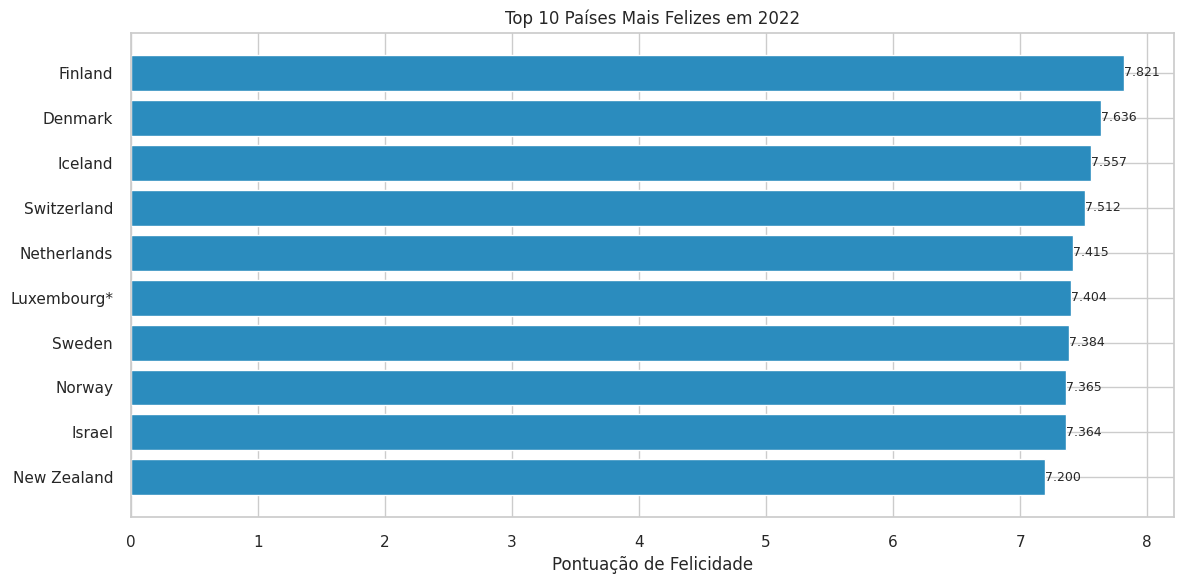

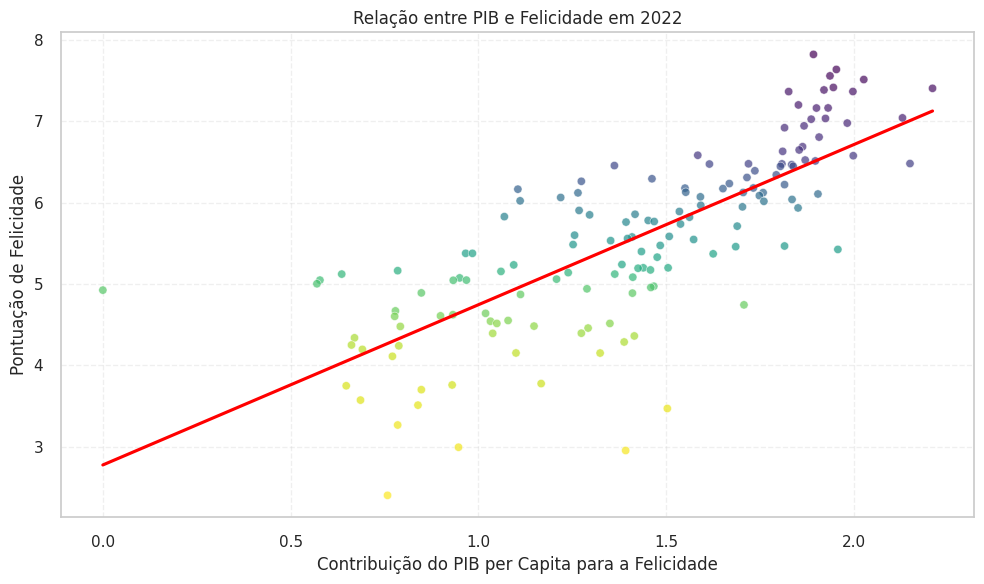

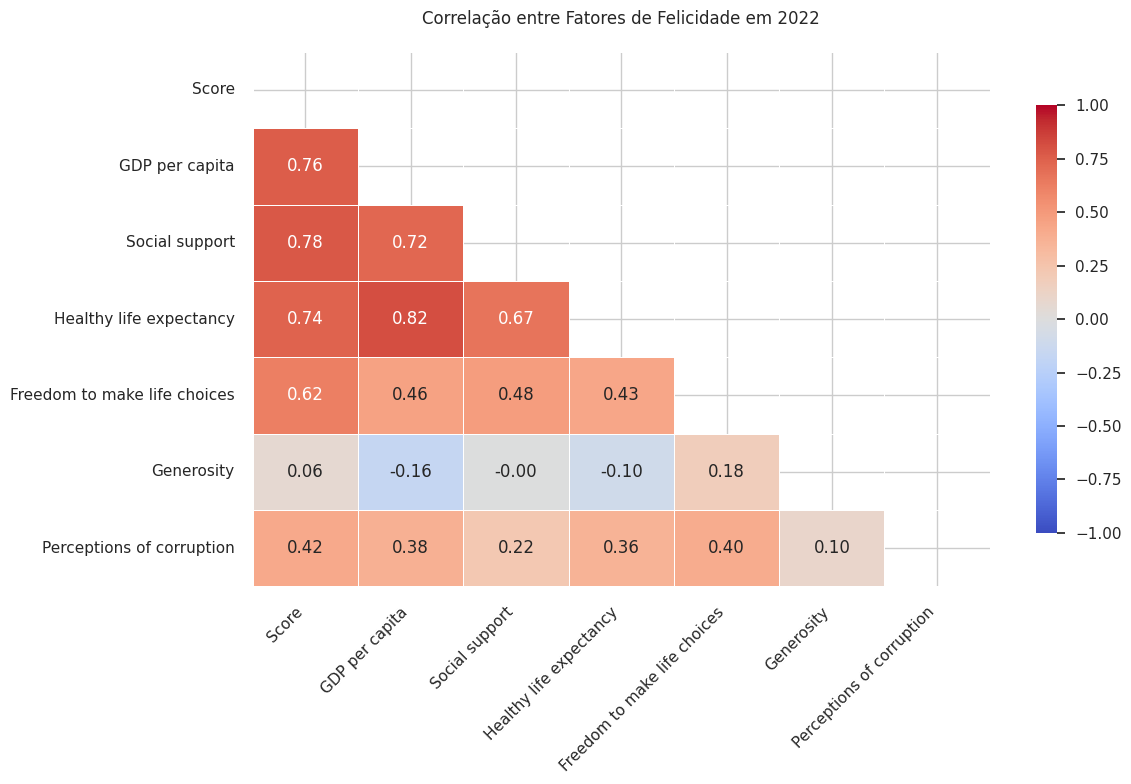

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_happiness_insights(df):
    """
    Gera 3 visualizações diferentes do dataset de felicidade mundial 2022.

    Parâmetros:
        df (DataFrame): DataFrame com os dados do relatório de felicidade
    """

    # Configuração do estilo dos gráficos
    plt.style.use('ggplot')  # Usando um estilo alternativo
    sns.set_theme(style="whitegrid")

    # Verificar e renomear coluna de pontuação se necessário
    if 'Happiness score' in df.columns:
        df['Score'] = df['Happiness score']  # Criar alias para consistência

    # 1. GRÁFICO DE BARRAS: Top 10 países mais felizes
    plt.figure(figsize=(12, 6))

    top10 = df.nlargest(10, 'Score').sort_values('Score', ascending=True)

    bars = plt.barh(top10['Country'], top10['Score'], color='#2b8cbe')
    plt.xlabel('Pontuação de Felicidade')
    plt.title('Top 10 Países Mais Felizes em 2022')

    # Adicionar valores nas barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'{width:.3f}',
                 va='center', ha='left', fontsize=9)

    plt.tight_layout()
    plt.show()

    # 2. GRÁFICO DE DISPERSÃO: Relação entre PIB e Felicidade
    plt.figure(figsize=(10, 6))

    gdp_col = 'Explained by: GDP per capita'

    sns.scatterplot(data=df, x=gdp_col, y='Score', hue='Country',
                    legend=False, alpha=0.7, palette='viridis')

    # Linha de tendência
    sns.regplot(data=df, x=gdp_col, y='Score',
                scatter=False, color='red', ci=None)

    plt.xlabel('Contribuição do PIB per Capita para a Felicidade')
    plt.ylabel('Pontuação de Felicidade')
    plt.title('Relação entre PIB e Felicidade em 2022')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 3. MAPA DE CALOR: Correlação entre indicadores
    plt.figure(figsize=(12, 8))

    # Selecionar colunas numéricas relevantes
    numeric_cols = ['Score', 'Explained by: GDP per capita',
                   'Explained by: Social support',
                   'Explained by: Healthy life expectancy',
                   'Explained by: Freedom to make life choices',
                   'Explained by: Generosity',
                   'Explained by: Perceptions of corruption']

    # Filtrar apenas colunas existentes
    numeric_cols = [col for col in numeric_cols if col in df.columns]

    corr = df[numeric_cols].corr()

    # Melhorar os nomes das colunas para visualização
    corr.columns = [col.replace('Explained by: ', '') for col in corr.columns]
    corr.index = [col.replace('Explained by: ', '') for col in corr.index]

    mask = np.triu(np.ones_like(corr, dtype=bool))  # Mascarar a metade superior
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
                cmap='coolwarm', center=0, vmin=-1, vmax=1,
                linewidths=0.5, cbar_kws={"shrink": .8})

    plt.title('Correlação entre Fatores de Felicidade em 2022', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Carregar os dados diretamente (substitua pelo seu caminho real)
file_path = "/content/World Happiness Report 2022_1713284660724.csv"
happiness_df = pd.read_csv(file_path)

# Executar a análise
plot_happiness_insights(happiness_df)